In [ ]:
conda install git
conda install pip
pip install git+git://github.com/Netflix/metaflow.git

In [26]:
# importing required packages
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.regularizers import L2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import cross_val_score, train_test_split

In [12]:
# import a dataset of your choice. I am using MNIST here 

from tensorflow.keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

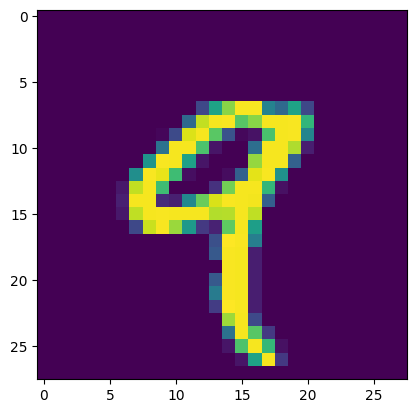

In [13]:
# printing the 4th image from training 
plt.imshow(X_train[4])

In [36]:
# Spliting training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=120)

# starting with a 1 layer NN 
opt_1 = Adam(learning_rate = 0.01)
model_1 = Sequential([layers.Input((28,28)), # each image is 28x28 in dimension
                      layers.Lambda(lambda x: x/255), #normalising layer
                      layers.Flatten(),
                      layers.Dense(10,activation = 'softmax')])

model_1.compile(optimizer = opt_1, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

History = model_1.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), batch_size = 100, epochs= 10)

# for this model, the val_loss is 0.3381 and val_accuracy is 0.9089

Epoch 1/10
420/420 [==============================] - 1s 1ms/step - loss: 0.3814 - accuracy: 0.8914 - val_loss: 0.3336 - val_accuracy: 0.9087
Epoch 2/10
420/420 [==============================] - 1s 1ms/step - loss: 0.2989 - accuracy: 0.9164 - val_loss: 0.3088 - val_accuracy: 0.9159
Epoch 3/10
420/420 [==============================] - 1s 1ms/step - loss: 0.2858 - accuracy: 0.9190 - val_loss: 0.3096 - val_accuracy: 0.9145
Epoch 4/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.9214 - val_loss: 0.2960 - val_accuracy: 0.9193
Epoch 5/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.9230 - val_loss: 0.3103 - val_accuracy: 0.9183
Epoch 6/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2671 - accuracy: 0.9255 - val_loss: 0.3165 - val_accuracy: 0.9152
Epoch 7/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.9254 - val_loss: 0.3089 - val_accuracy: 0.9192
Epoch 

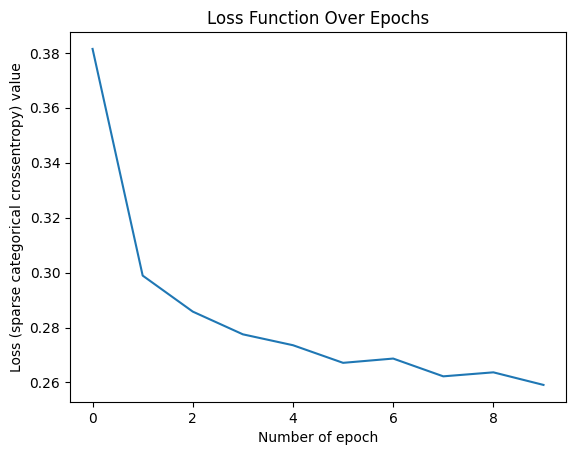

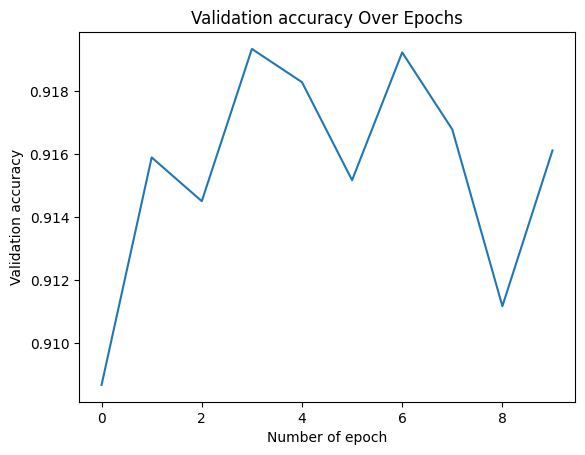

In [37]:
# plotting validation loss and accuracy

plt.plot(History.history['loss'])
plt.title('Loss Function Over Epochs')
plt.ylabel('Loss (sparse categorical crossentropy) value')
plt.xlabel('Number of epoch')
plt.show()
plt.plot(History.history['val_accuracy'])
plt.title('Validation accuracy Over Epochs')
plt.ylabel('Validation accuracy')
plt.xlabel('Number of epoch')
plt.show()

In [16]:
# defining a function with all hyperparameters being inputs of the function

def buildModel(neurons, activation, dropout,learning_rate, kernel_regularizer):
    # Initialising the ANN
    classifier =Sequential([layers.Input((28,28)),                       
                      layers.Lambda(lambda x: x/255), #normalising layer
                      layers.Flatten(),
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout), 
                      layers.Dense(10, activation = 'softmax')])
    
    # Compiling the ANN
    classifier.compile(loss='sparse_categorical_crossentropy', 
                       optimizer= Adam(learning_rate = learning_rate), metrics=['accuracy'])
    
    
    return classifier

In [ ]:
# using kerasclassifier to perform grid search, the code is developed using functions on the following website
# https://www.adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html
    
classifier = KerasClassifier(build_fn = buildModel)

# various hyperparameter values we want to test
parameters = {'batch_size':  [300, 500],
              'epochs': [20, 50, 100],
              "activation": ['relu', 'sigmoid'],
              "dropout":[0.05, 0.1, 0.2],
              "learning_rate":[0.01, 0.1],
              "kernel_regularizer" : [0.02, 0.4],
              "neurons":[100, 182]
             }
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           cv = 2)

# does not need training and validation data separately
grid_search = grid_search.fit(X, y)

# note: if you have a large dataset, it may take a long time to run depending on your GPU if multiple values for the hyperparameters are specified
# in such cases, run cross validation on small subsets of hyperparameter values and update them based on the results achieved



In [18]:
# then view the grid and find the best hyperparamters as below:

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))
pd.DataFrame(grid_search.cv_results_)


# I get Best Parameters: {'activation': 'relu', 'batch_size': 500, 'dropout': 0.2, 'epochs': 100, 'kernel_regularizer': 0.0, 'learning_rate': 0.01, 'neurons': 182}

Best Parameters: {'activation': 'relu', 'batch_size': 500, 'dropout': 0.2, 'epochs': 100, 'kernel_regularizer': 0.0, 'learning_rate': 0.01, 'neurons': 182}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_dropout,param_epochs,param_kernel_regularizer,param_learning_rate,param_neurons,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,10.058553,0.102031,0.387534,0.003510,relu,100,0.05,20,0.0,0.01,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.963567,0.967567,0.965567,0.002000,105
1,10.009618,0.081192,0.377905,0.006590,relu,100,0.05,20,0.0,0.1,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.767967,0.825900,0.796933,0.028967,156
2,10.086862,0.509336,0.405761,0.007095,relu,100,0.05,20,0.0,0.01,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.967700,0.965567,0.966633,0.001067,100
3,24.663162,0.614068,0.384595,0.004883,relu,100,0.05,50,0.0,0.01,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.969400,0.968467,0.968933,0.000467,86
4,24.632522,0.365690,0.480215,0.102712,relu,100,0.05,50,0.0,0.1,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.750367,0.812067,0.781217,0.030850,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,11.115973,0.174052,0.199024,0.004100,sigmoid,500,0.2,50,0.0,0.1,182,"{'activation': 'sigmoid', 'batch_size': 500, '...",0.950767,0.951367,0.951067,0.000300,113
158,10.710418,0.014907,0.190614,0.003175,sigmoid,500,0.2,50,0.0,0.01,182,"{'activation': 'sigmoid', 'batch_size': 500, '...",0.971300,0.972000,0.971650,0.000350,14
159,20.058825,0.049122,0.185019,0.000971,sigmoid,500,0.2,100,0.0,0.01,182,"{'activation': 'sigmoid', 'batch_size': 500, '...",0.973367,0.970267,0.971817,0.001550,12
160,19.985077,0.096105,0.183319,0.000039,sigmoid,500,0.2,100,0.0,0.1,182,"{'activation': 'sigmoid', 'batch_size': 500, '...",0.957433,0.952400,0.954917,0.002517,110


In [19]:
# fit a model with the cross-validated hyper-parameters

model_2 = Sequential([layers.Input((28,28)),                       
                layers.Lambda(lambda x: x/255), #normalising layer
                layers.Flatten(),
                layers.Dense(182, activation = "relu", kernel_regularizer = L2(0)),
                layers.Dropout(0.2), 
                layers.Dense(10, activation = 'softmax')])
    
    # Compiling the ANN
model_2.compile(loss='sparse_categorical_crossentropy', 
                       optimizer= Adam(learning_rate = 0.01), metrics=['accuracy'])

History = model_2.fit(x = X, y = y, batch_size = 500, epochs= 100)



Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 0.3008 - accuracy: 0.9075
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9597
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9693
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9733
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9771
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9779
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9796
Epoch 8/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9814
Epoch 9/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9835
Epoch 10/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0474 - accura

In [ ]:
# more layers can be added to the network the following way:

def buildModel(neurons, activation, dropout,learning_rate, kernel_regularizer):
    # Initialising the ANN
    classifier =Sequential([layers.Input((91)), 
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout), 
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout),
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout),
                      layers.Dense(2, activation = 'softmax')])
    
    # Compiling the ANN
    classifier.compile(loss='sparse_categorical_crossentropy', 
                       optimizer= Adam(learning_rate = learning_rate), metrics=['accuracy']) 
    
    return classifier


classifier = KerasClassifier(build_fn = buildModel)

313/313 [==============================] - 0s 425us/step
0.9177
313/313 [==============================] - 0s 549us/step
0.9804


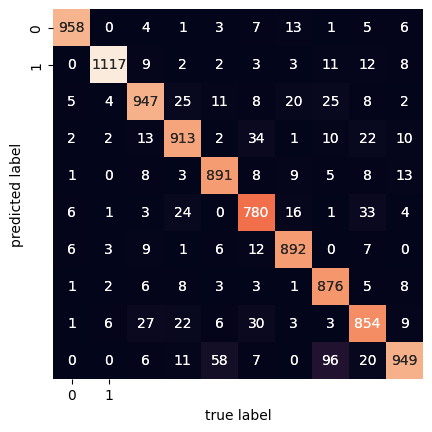

In [30]:
# compare the two models using the testing dataset

predictions1 = model_1.predict(X_test)
prediction_class1 = np.argmax(predictions1, axis=1)

mat = confusion_matrix(y_test, prediction_class1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=(0,1), yticklabels=(0,1))
plt.xlabel('true label')
plt.ylabel('predicted label');

print(accuracy_score(y_test, prediction_class1))

predictions2 = model_2.predict(X_test)
prediction_class2 = np.argmax(predictions2, axis=1)

mat2 = confusion_matrix(y_test, prediction_class2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=(0,1), yticklabels=(0,1))
plt.xlabel('true label')
plt.ylabel('predicted label');

print(accuracy_score(y_test, prediction_class2))

# accuracy improved from 91.8% to 98%. Therefore the second model performs better on the test data


In [ ]:
# the training times can also be estimated based on the change on hyperparameters such as number of layers, epoches, learning rate

# the following calculates the training time with the change in the number of epoches

# the model as before
def buildModel(neurons, activation, dropout,learning_rate, kernel_regularizer):
    # Initialising the ANN
    classifier =Sequential([layers.Input((28,28)),                       
                      layers.Lambda(lambda x: x/255), #normalising layer
                      layers.Flatten(),
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout), 
                      layers.Dense(10, activation = 'softmax')])
    
    # Compiling the ANN
    classifier.compile(loss='sparse_categorical_crossentropy', 
                       optimizer= Adam(learning_rate = learning_rate), metrics=['accuracy'])
    
    
    return classifier


epochs = []
timelist = []    

# only changing the number of epochs
for i in [5, 10, 20,50, 80, 100, 120, 150, 180, 200, 250, 300]:

    classifier = KerasClassifier(build_fn = buildModel)

    parameters = {'batch_size':  [500],
                  'epochs': [i],
                  "activation": ["relu"],
                  "dropout":[0.2],
                  "learning_rate":[0.01],
                  "kernel_regularizer": [0],
                  "neurons":[182]
                     }
    start = time.time()

    grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           cv = 5)

    grid_search = grid_search.fit(X, y)

        
    stop = time.time()
    # recording training times
    timelist.append(np.round(stop - start, 3))
    epochs.append(i)

# printing out the training time and the cross validated scores for different number of estimaters 

# NN traing time
datann = (pd.DataFrame({"time taken" : timelist, "epochs" :epochs}))





Text(0, 0.5, 'Time taken (in seconds)')

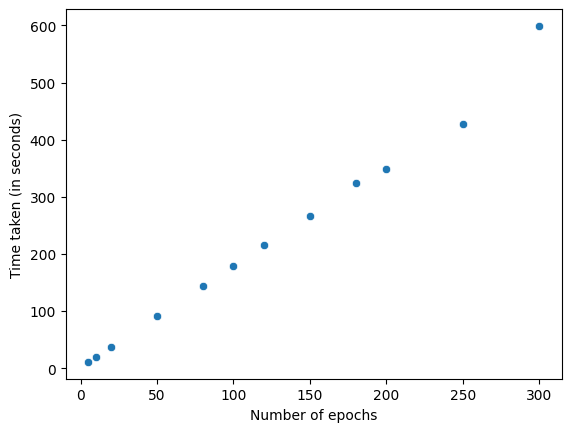

In [34]:
# plotting training time against the number of estimators 
sns.scatterplot( x= datann["epochs"] , y= datann["time taken"])

plt.xlabel("Number of epochs")
plt.ylabel("Time taken (in seconds)")